In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('dark_background')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import ParameterGrid, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift
from sklearn.metrics import silhouette_score

In [2]:
df_cleaned1=pd.read_csv('C:/Users/adham.hany/Desktop/OBD/PREPROCCED_DATA.csv')
df_cleaned1.head()

TIMESTAMP  MARK  MODEL  ENGINE_POWER  AUTOMATIC  VEHICLE_ID  \
0   0.004000     0      1           1.4          0           1   
1   0.009999     0      1           1.4          0           1   
2   0.019000     0      1           1.4          0           1   
3   0.028999     0      1           1.4          0           1   
4   0.032999     0      1           1.4          0           1   

   BAROMETRIC_PRESSURE(KPA)  FUEL_LEVEL  ENGINE_LOAD  ENGINE_RPM  ...  \
0                 100.12487   37.538494         38.8       754.0  ...   
1                 100.12487   37.538494         38.8       754.0  ...   
2                 100.12487   37.538494         38.8       754.0  ...   
3                 100.12487   37.538494         38.8       754.0  ...   
4                 100.00000   73.300000         38.4      1847.0  ...   

   DAYS_OF_WEEK  MONTHS  Total_Engine_Seconds  Acceleration  Braking  \
0           5.0     8.0            545.522918           0.0        0   
1           4.0     9.0            545.522918           0.0        0   
2           0.0     8.0            545.522918           0.0        0   
3           4.0     8.0            545.522918        9250.0        0   
4           0.0     8.0            209.000000    -1000000.0        1   

   Engine_Load_Percentage  Wheels_Tuning_Index  VEHICLE_AGE  TEMP_DIFFERENCE  \
0               19.758910             7.924254          6.0        56.004838   
1               19.758910             7.924254          6.0        53.696483   
2               19.758910             7.924254          6.0        53.153341   
3               19.758910             7.924254          6.0        53.968054   
4               48.401468            19.395070          6.0        54.539023   

   AVG_Short_term_fuel_trim  
0               -100.000000  
1               -100.000000  
2               -100.000000  
3               -100.000000  
4                -99.986659  

[5 rows x 32 columns]

In [3]:
df_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45997 entries, 0 to 45996
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TIMESTAMP                   45997 non-null  float64
 1   MARK                        45997 non-null  int64  
 2   MODEL                       45997 non-null  int64  
 3   ENGINE_POWER                45997 non-null  float64
 4   AUTOMATIC                   45997 non-null  int64  
 5   VEHICLE_ID                  45997 non-null  int64  
 6   BAROMETRIC_PRESSURE(KPA)    45997 non-null  float64
 7   FUEL_LEVEL                  45997 non-null  float64
 8   ENGINE_LOAD                 45997 non-null  float64
 9   ENGINE_RPM                  45997 non-null  float64
 10  INTAKE_MANIFOLD_PRESSURE    45997 non-null  float64
 11  MAF                         45997 non-null  float64
 12  LONG TERM FUEL TRIM BANK 2  45997 non-null  float64
 13  FUEL_TYPE                   459

In [4]:
df_cleaned_labeled=df_cleaned1.copy()

In [5]:
df_cleaned_labeled=df_cleaned_labeled.drop(columns=[('MARK'),('MODEL')])

In [6]:
import joblib


In [7]:
print(df_cleaned_labeled.iloc[0])

TIMESTAMP                       0.004000
ENGINE_POWER                    1.400000
AUTOMATIC                       0.000000
VEHICLE_ID                      1.000000
BAROMETRIC_PRESSURE(KPA)      100.124870
FUEL_LEVEL                     37.538494
ENGINE_LOAD                    38.800000
ENGINE_RPM                    754.000000
INTAKE_MANIFOLD_PRESSURE       30.000000
MAF                             7.971288
LONG TERM FUEL TRIM BANK 2   -100.000000
FUEL_TYPE                       0.000000
AIR_INTAKE_TEMP                41.185249
SPEED                           0.000000
THROTTLE_POS                   18.000000
DTC_NUMBER                      0.000000
TROUBLE_CODES                   0.000000
TIMING_ADVANCE                 58.400000
MIN                            58.000000
HOURS                           1.000000
DAYS_OF_WEEK                    5.000000
MONTHS                          8.000000
Total_Engine_Seconds          545.522918
Acceleration                    0.000000
Braking         

In [8]:
import sys
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from joblib import dump, load

# Assuming df_cleaned_labeled is your DataFrame
# Create a copy of the DataFrame
df_cleaned_labeled = df_cleaned_labeled.copy()

# Define the columns to exclude from scaling
columns_to_exclude = ['VEHICLE_ID', 'TIMESTAMP']
columns_to_scale = [
    'ENGINE_POWER', 'AUTOMATIC', 'BAROMETRIC_PRESSURE(KPA)', 'FUEL_LEVEL', 
    'ENGINE_LOAD', 'ENGINE_RPM', 'INTAKE_MANIFOLD_PRESSURE', 'MAF', 
    'LONG TERM FUEL TRIM BANK 2', 'FUEL_TYPE', 'AIR_INTAKE_TEMP', 'SPEED', 
    'THROTTLE_POS', 'DTC_NUMBER', 'TROUBLE_CODES', 'TIMING_ADVANCE', 'MIN', 
    'HOURS', 'DAYS_OF_WEEK', 'MONTHS', 'Total_Engine_Seconds', 'Acceleration', 
    'Braking', 'Engine_Load_Percentage', 'Wheels_Tuning_Index', 'VEHICLE_AGE', 
    'TEMP_DIFFERENCE', 'AVG_Short_term_fuel_trim'
]

# Scale the features
scaler = StandardScaler()
df_cleaned_labeled[columns_to_scale] = scaler.fit_transform(df_cleaned_labeled[columns_to_scale])

# Save the scaler to a file
dump(scaler, 'scaler.joblib')

# Display the first few rows of the scaled DataFrame
df_cleaned_labeled.iloc[0]

# Load the scaler from the file (for future use)
# scaler_loaded = load('scaler.joblib')



TIMESTAMP                     0.004000
ENGINE_POWER                 -0.408392
AUTOMATIC                    -0.633736
VEHICLE_ID                    1.000000
BAROMETRIC_PRESSURE(KPA)      0.394860
FUEL_LEVEL                    0.934328
ENGINE_LOAD                  -0.065899
ENGINE_RPM                   -0.897199
INTAKE_MANIFOLD_PRESSURE     -0.546338
MAF                          -0.061214
LONG TERM FUEL TRIM BANK 2   -0.962533
FUEL_TYPE                    -0.054657
AIR_INTAKE_TEMP               0.002185
SPEED                        -0.863218
THROTTLE_POS                  0.001678
DTC_NUMBER                   -0.389537
TROUBLE_CODES                -0.389537
TIMING_ADVANCE                0.165896
MIN                           1.844020
HOURS                        -1.908128
DAYS_OF_WEEK                  1.161183
MONTHS                       -0.007532
Total_Engine_Seconds         -0.325821
Acceleration                  0.004342
Braking                      -0.784513
Engine_Load_Percentage   

In [9]:
df_cleaned_labeled[columns_to_scale]

ENGINE_POWER  AUTOMATIC  BAROMETRIC_PRESSURE(KPA)  FUEL_LEVEL  \
0         -0.408392  -0.633736                  0.394860    0.934328   
1         -0.408392  -0.633736                  0.394860    0.934328   
2         -0.408392  -0.633736                  0.394860    0.934328   
3         -0.408392  -0.633736                  0.394860    0.934328   
4         -0.408392  -0.633736                  0.353922    2.958885   
...             ...        ...                       ...         ...   
45992      0.470717  -0.633736                 -0.454925   -0.900849   
45993      0.470717  -0.633736                 -0.454925   -0.847911   
45994      0.470717  -0.633736                 -0.454925   -0.830265   
45995      0.470717  -0.633736                 -0.454925   -0.830265   
45996      0.470717  -0.633736                 -0.454925   -0.847911   

       ENGINE_LOAD  ENGINE_RPM  INTAKE_MANIFOLD_PRESSURE       MAF  \
0        -0.065899   -0.897199                 -0.546338 -0.061214   
1        -0.065899   -0.897199                 -0.546338 -0.061214   
2        -0.065899   -0.897199                 -0.546338 -0.061214   
3        -0.065899   -0.897199                 -0.546338 -0.061214   
4        -0.088650    0.850548                 -0.662797  0.102698   
...            ...         ...                       ...       ...   
45992    -0.936115    0.804176                  1.025854 -0.866099   
45993    -1.846144   -0.718107                 -0.196962 -1.707809   
45994    -1.914396    0.287688                  0.909396 -1.770938   
45995    -1.959898    0.401219                 -0.429880 -1.813023   
45996    -0.111400    0.741814                  1.084084 -0.103299   

       LONG TERM FUEL TRIM BANK 2  FUEL_TYPE  ...  DAYS_OF_WEEK    MONTHS  \
0                       -0.962533  -0.054657  ...      1.161183 -0.007532   
1                       -0.962533  -0.054657  ...      0.646374  1.448219   
2                       -0.962533  -0.054657  ...     -1.412863 -0.007532   
3                       -0.962533  -0.054657  ...      0.646374 -0.007532   
4                       -0.961824  -0.054657  ...     -1.412863 -0.007532   
...                           ...        ...  ...           ...       ...   
45992                    0.927475  -0.054657  ...      1.675992 -0.007532   
45993                    0.872976  -0.054657  ...      1.675992 -0.007532   
45994                    0.854809  -0.054657  ...      1.675992 -0.007532   
45995                    0.854809  -0.054657  ...      1.675992 -0.007532   
45996                    0.872976  -0.054657  ...      1.675992 -0.007532   

       Total_Engine_Seconds  Acceleration   Braking  Engine_Load_Percentage  \
0                 -0.325821      0.004342 -0.784513               -0.991999   
1                 -0.325821      0.004342 -0.784513               -0.991999   
2                 -0.325821      0.004342 -0.784513               -0.991999   
3                 -0.325821      0.049281 -0.784513               -0.991999   
4                 -0.620039     -4.853950  1.274677                0.549341   
...                     ...           ...       ...                     ...   
45992              0.376405      0.003146  1.274677                1.425040   
45993              0.376405      0.005367 -0.784513               -0.397440   
45994              0.376405      0.004138  1.274677                0.806699   
45995              0.376405      0.004837 -0.784513                0.942619   
45996              0.376405      0.002959  1.274677                1.350380   

       Wheels_Tuning_Index  VEHICLE_AGE  TEMP_DIFFERENCE  \
0                -0.991658    -0.075541         0.180658   
1                -0.991658    -0.075541        -0.066575   
2                -0.991658    -0.075541        -0.124747   
3                -0.991658    -0.075541        -0.037488   
4                 0.551010    -0.075541         0.023664   
...                    ...          ...              ...   
45992  

# **_PCA_**

Number of Components: 1, Cumulative Explained Variance Ratio: 0.8701, Approx. AIC: 346756.0215
Number of Components: 2, Cumulative Explained Variance Ratio: 0.9278, Approx. AIC: 317831.2361
Number of Components: 3, Cumulative Explained Variance Ratio: 0.9409, Approx. AIC: 299829.4002
Number of Components: 4, Cumulative Explained Variance Ratio: 0.9521, Approx. AIC: 287140.4713
Number of Components: 5, Cumulative Explained Variance Ratio: 0.9606, Approx. AIC: 277288.1384
Number of Components: 6, Cumulative Explained Variance Ratio: 0.9659, Approx. AIC: 269154.6634
Number of Components: 7, Cumulative Explained Variance Ratio: 0.9699, Approx. AIC: 262257.5801
Number of Components: 8, Cumulative Explained Variance Ratio: 0.9733, Approx. AIC: 256276.9277
Number of Components: 9, Cumulative Explained Variance Ratio: 0.9762, Approx. AIC: 251001.1460
Number of Components: 10, Cumulative Explained Variance Ratio: 0.9791, Approx. AIC: 246293.1140
Number of Components: 11, Cumulative Explained Va

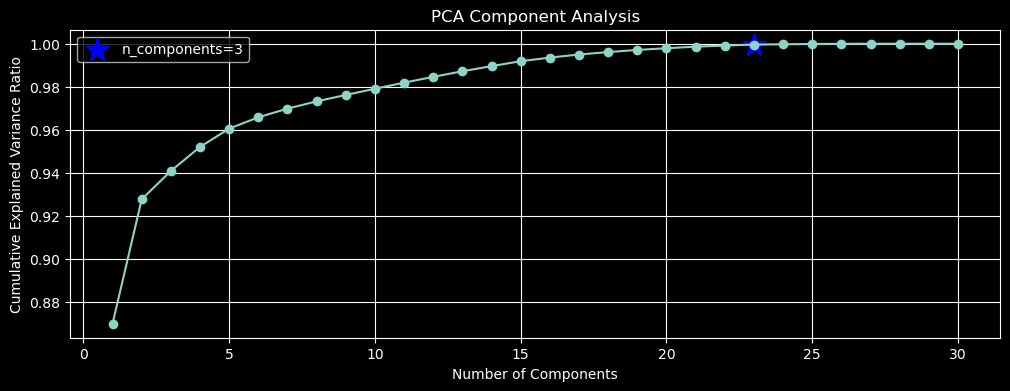

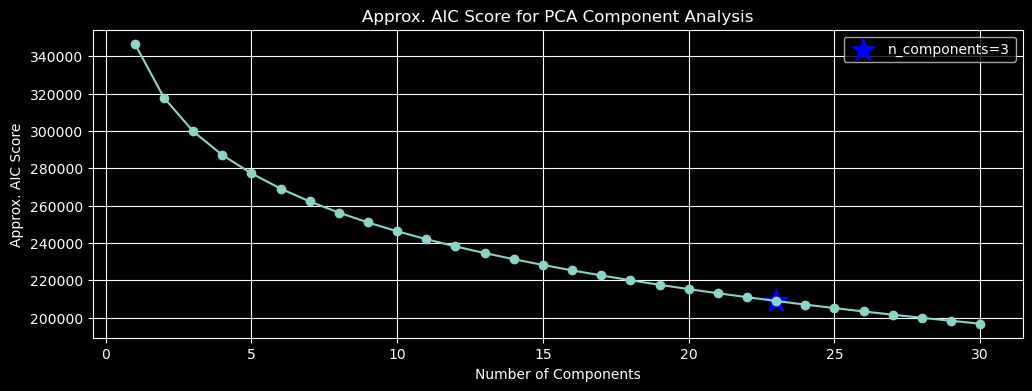

In [10]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


X = df_cleaned_labeled.copy()
n_components = np.arange(1, 31)  # Considering up to 29 components
explained_variance_ratios = []
aic_scores = []

for n in n_components:
    pca = PCA(n_components=n)
    X_transformed = pca.fit_transform(X)

    # Cumulative explained variance ratio
    cum_explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variance_ratios.append(cum_explained_variance)

    # Compute AIC-like score
    k = n  # Number of components
    # PCA does not use likelihood directly; this is an approximation
    # Assuming 'variance' to approximate the log-likelihood term
    log_likelihood = -0.5 * X.shape[0] * np.log(2 * np.pi * np.mean(pca.explained_variance_))
    aic = 2 * k - 2 * log_likelihood
    aic_scores.append(aic)

    print(f"Number of Components: {n}, Cumulative Explained Variance Ratio: {cum_explained_variance:.4f}, Approx. AIC: {aic:.4f}")

# Plot the cumulative explained variance ratio
plt.figure(figsize=(12, 4))
plt.plot(n_components, explained_variance_ratios, marker='o')
plt.scatter(23, explained_variance_ratios[22], c='b', marker='*', label="n_components=3", s=300)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Component Analysis')
plt.legend()
plt.grid(True)
plt.show()

# Plot the AIC scores
plt.figure(figsize=(12, 4))
plt.plot(n_components, aic_scores, marker='o')
plt.scatter(23, aic_scores[22], c='b', marker='*', label="n_components=3", s=300)
plt.xlabel('Number of Components')
plt.ylabel('Approx. AIC Score')
plt.title('Approx. AIC Score for PCA Component Analysis')
plt.legend()
plt.grid(True)
plt.show()

**_Before and After model comparision_**

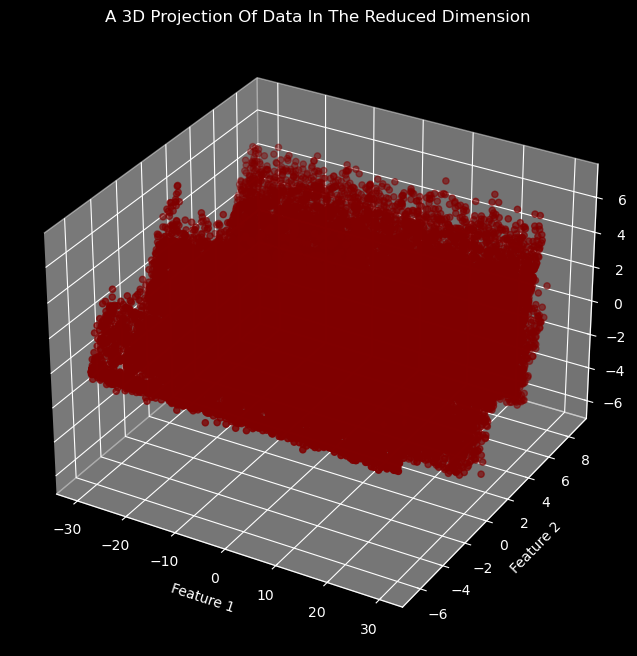

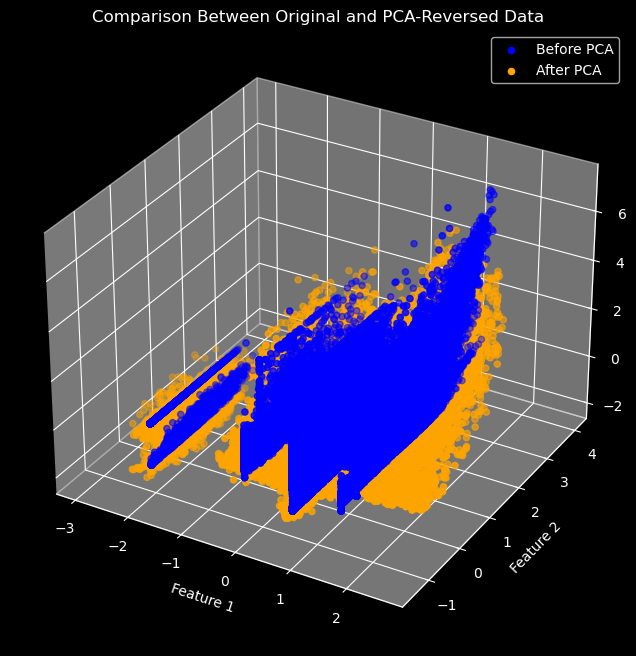

In [11]:
pca = PCA(n_components=19,copy=True)
X=df_cleaned_labeled.copy()
X_transformed = pca.fit_transform(X)
afterreverse = pca.inverse_transform(X_transformed)

# Create DataFrames for PCA components and reversed data
PCA_ds = pd.DataFrame(X_transformed, columns=[f"f{i+1}" for i in range(19)])
afterreverse_df = pd.DataFrame(afterreverse, columns=X.columns)

# Select three components for 3D visualization
# Ensure you have at least 3 components in PCA
x = PCA_ds["f1"]
y = PCA_ds["f2"]
z = PCA_ds["f3"]

# Plot 3D projection of PCA-transformed data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="maroon", marker="o")
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()

# Select features from the original DataFrame
x1 = df_cleaned_labeled["ENGINE_POWER"]
y1 = df_cleaned_labeled["SPEED"]
z1 = df_cleaned_labeled["MAF"]

# Select the same features from the reversed data
# Ensure these columns exist in afterreverse_df
x2 = afterreverse_df["ENGINE_POWER"]
y2 = afterreverse_df["SPEED"]
z2 = afterreverse_df["MAF"]

# Plot comparison between original and PCA-reversed data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x1, y1, z1, c="blue", marker="o", label="Before PCA")
ax.scatter(x2, y2, z2, c="orange", marker="o", label="After PCA")
ax.set_title("Comparison Between Original and PCA-Reversed Data")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.legend()
plt.show()


**_1)Kmeans_**

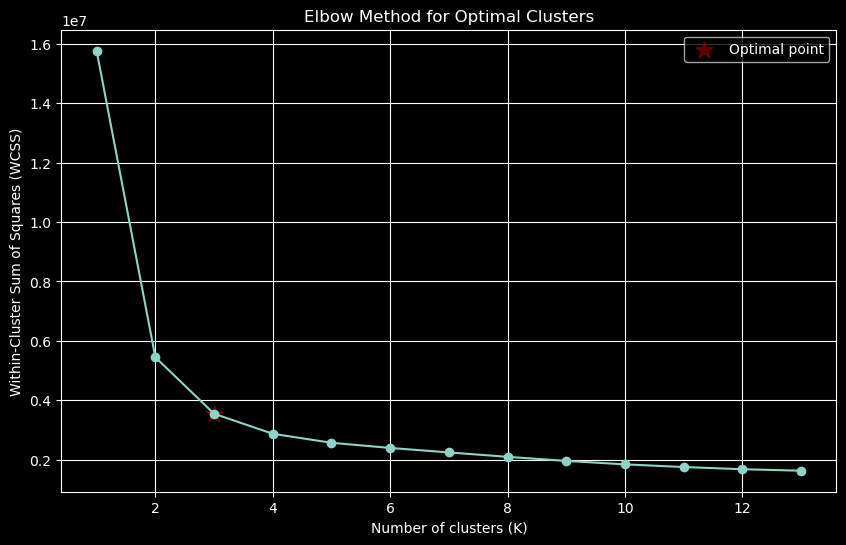

In [12]:
X_scaled = df_cleaned_labeled.copy()
pca = PCA(n_components=19)  # Adjust n_components if needed
X_transformed = pca.fit_transform(X_scaled)


wcss = []
for i in range(1, 14):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 14), wcss, marker='o')
plt.scatter(3, wcss[2], marker='*', s=159, alpha=0.7, c='maroon', label='Optimal point')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
X_transformed.shape

(45997, 19)

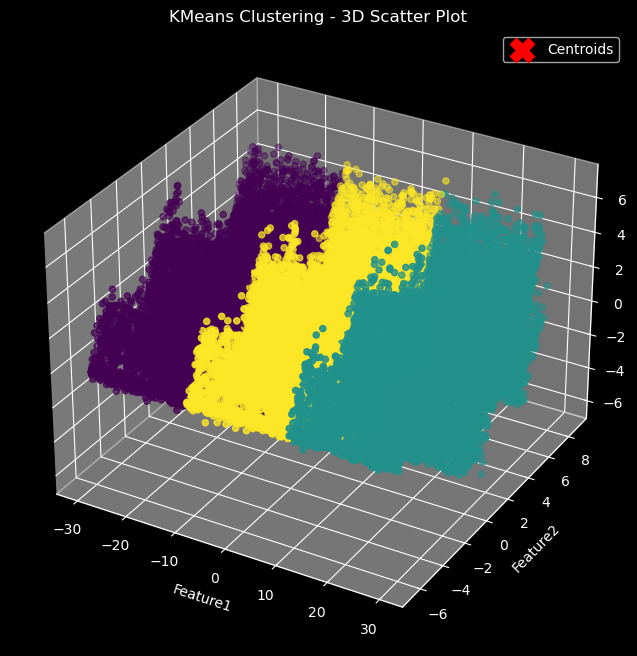

In [14]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit_predict(X_transformed)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=labels, cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           s=300, c='red', marker='X', label='Centroids')

ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')
ax.set_zlabel('Feature3')
ax.set_title('KMeans Clustering - 3D Scatter Plot')
ax.legend()

plt.show()

In [15]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_transformed, labels)
silhouette_avg

0.40117740026301496

In [16]:
df_cleaned_labeled_final=df_cleaned_labeled.copy()
df_cleaned_labeled['labels'] = labels
df_cleaned_labeled_final=df_cleaned_labeled.copy()
df_cleaned_labeled_final.head()

TIMESTAMP  ENGINE_POWER  AUTOMATIC  VEHICLE_ID  BAROMETRIC_PRESSURE(KPA)  \
0   0.004000     -0.408392  -0.633736           1                  0.394860   
1   0.009999     -0.408392  -0.633736           1                  0.394860   
2   0.019000     -0.408392  -0.633736           1                  0.394860   
3   0.028999     -0.408392  -0.633736           1                  0.394860   
4   0.032999     -0.408392  -0.633736           1                  0.353922   

   FUEL_LEVEL  ENGINE_LOAD  ENGINE_RPM  INTAKE_MANIFOLD_PRESSURE       MAF  \
0    0.934328    -0.065899   -0.897199                 -0.546338 -0.061214   
1    0.934328    -0.065899   -0.897199                 -0.546338 -0.061214   
2    0.934328    -0.065899   -0.897199                 -0.546338 -0.061214   
3    0.934328    -0.065899   -0.897199                 -0.546338 -0.061214   
4    2.958885    -0.088650    0.850548                 -0.662797  0.102698   

   ...    MONTHS  Total_Engine_Seconds  Acceleration   Braking  \
0  ... -0.007532             -0.325821      0.004342 -0.784513   
1  ...  1.448219             -0.325821      0.004342 -0.784513   
2  ... -0.007532             -0.325821      0.004342 -0.784513   
3  ... -0.007532             -0.325821      0.049281 -0.784513   
4  ... -0.007532             -0.620039     -4.853950  1.274677   

   Engine_Load_Percentage  Wheels_Tuning_Index  VEHICLE_AGE  TEMP_DIFFERENCE  \
0               -0.991999            -0.991658    -0.075541         0.180658   
1               -0.991999            -0.991658    -0.075541        -0.066575   
2               -0.991999            -0.991658    -0.075541        -0.124747   
3               -0.991999            -0.991658    -0.075541        -0.037488   
4                0.549341             0.551010    -0.075541         0.023664   

   AVG_Short_term_fuel_trim  labels  
0                 -0.965672       0  
1                 -0.965672       0  
2                 -0.965672       0  
3                 -0.965672       0  
4                 -0.965403       0  

[5 rows x 31 columns]

In [17]:
print(df_cleaned1.iloc[0])


TIMESTAMP                       0.004000
MARK                            0.000000
MODEL                           1.000000
ENGINE_POWER                    1.400000
AUTOMATIC                       0.000000
VEHICLE_ID                      1.000000
BAROMETRIC_PRESSURE(KPA)      100.124870
FUEL_LEVEL                     37.538494
ENGINE_LOAD                    38.800000
ENGINE_RPM                    754.000000
INTAKE_MANIFOLD_PRESSURE       30.000000
MAF                             7.971288
LONG TERM FUEL TRIM BANK 2   -100.000000
FUEL_TYPE                       0.000000
AIR_INTAKE_TEMP                41.185249
SPEED                           0.000000
THROTTLE_POS                   18.000000
DTC_NUMBER                      0.000000
TROUBLE_CODES                   0.000000
TIMING_ADVANCE                 58.400000
MIN                            58.000000
HOURS                           1.000000
DAYS_OF_WEEK                    5.000000
MONTHS                          8.000000
Total_Engine_Sec